<a href="https://colab.research.google.com/github/padhisagar/Data_Science_Learning/blob/main/EDA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('waterDataMaster.csv')
df.drop(['BOD','_id','className','dissolvedOxygen','fecalColiform','nitrate','wqi'],axis=1,inplace=True)
df.head()

,pH,readDate,stnId
0,7.54,2021-03-10T00:00:00.000Z,2178
1,7.00,2021-03-10T00:00:00.000Z,2183
2,7.64,2021-03-10T00:00:00.000Z,2181
3,8.09,2021-03-10T00:00:00.000Z,2161
4,7.84,2021-03-10T00:00:00.000Z,2664


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26654 entries, 0 to 26653
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pH        26654 non-null  float64
 1   readDate  26654 non-null  object 
 2   stnId     26654 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 624.8+ KB


In [4]:
df['readDate'] = pd.to_datetime(df['readDate']).dt.date
df = df.set_index('readDate',drop=True)

In [5]:
df.head(5)

,pH,stnId
readDate,,
2021-03-10,7.54,2178
2021-03-10,7.00,2183
2021-03-10,7.64,2181
2021-03-10,8.09,2161
2021-03-10,7.84,2664


In [6]:
df.describe()

,pH,stnId
count,26654.000000,26654.000000
mean,-2275.691815,2257.228934
std,47786.038307,1139.670093
min,-999999.000000,11.000000
25%,7.400000,2155.000000
50%,7.800000,2652.000000
75%,8.100000,2705.000000
max,7023.000000,26789.000000


In [7]:
df1 = df[df['stnId']==2178]

In [8]:
df1.index.dtype

dtype('O')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 2021-03-10 to 2008-02-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      128 non-null    float64
 1   stnId   128 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.0+ KB


In [10]:
df1.head(30)

,pH,stnId
readDate,,
2021-03-10,7.54,2178
2021-02-03,7.96,2178
2021-01-08,7.79,2178
2020-12-09,7.69,2178
2020-11-06,7.55,2178
2020-10-07,7.12,2178
2020-09-12,7.69,2178
2020-08-05,7.34,2178
2020-07-01,7.51,2178


<Axes: xlabel='readDate'>

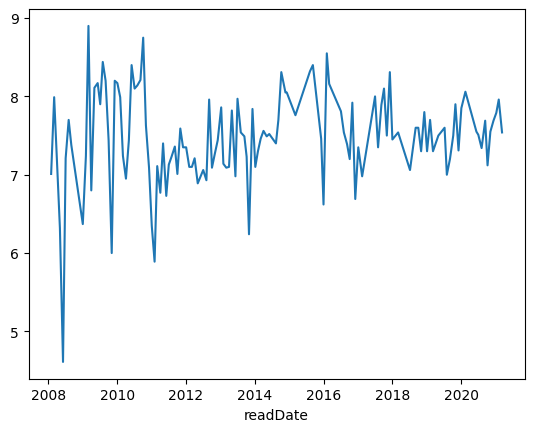

In [11]:
df1['pH'].plot()

Text(0.5, 1.0, 'Box Plot')

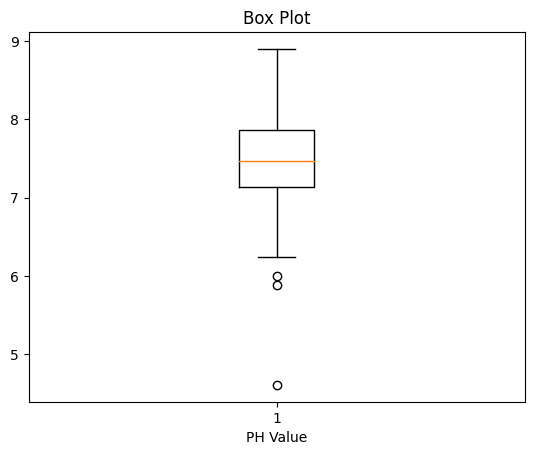

In [12]:
plt.boxplot(df1['pH'])
plt.xlabel('PH Value')
plt.title('Box Plot')

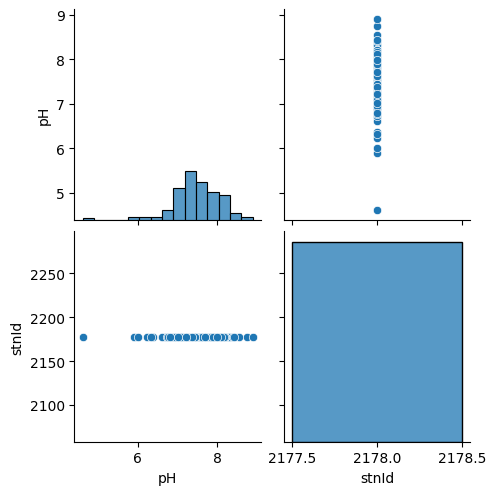

In [13]:
sns.pairplot(df1)

In [14]:
df1.index.min()

datetime.date(2008, 2, 1)

In [15]:
df1.index.max()

datetime.date(2021, 3, 10)

In [16]:
def CheckOutlierandReplace(data):
  q1 = data['pH'].quantile(0.25)
  q3 = data['pH'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr


In [17]:
date_range = pd.date_range(start=df1.index.min(), end=df1.index.max(), freq='MS')

In [18]:
df1 = df1.reindex(date_range)

In [19]:
df1['pH'].isnull().sum()

149

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
q1 = df1['pH'].quantile(0.25)
q3 = df1['pH'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(df1.shape)
print(df1[(df1['pH'] >= lower_bound) & (df1['pH'] <= upper_bound)].shape)


(158, 2)
(9, 2)


Text(0.5, 1.0, 'Box Plot')

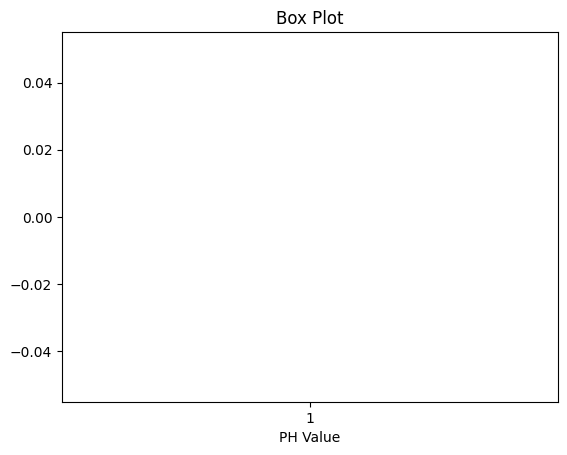

In [22]:
plt.boxplot(df1['pH'])
plt.xlabel('PH Value')
plt.title('Box Plot')

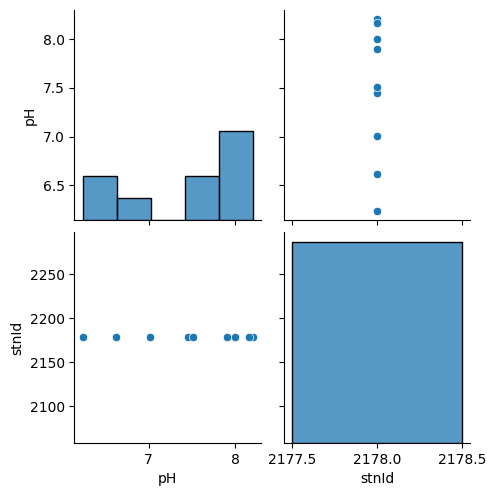

In [23]:
sns.pairplot(df1)

In [24]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [25]:
adf_test(df1['pH'])

MissingDataError: ignored

In [ ]:
df1['pH'].plot()

In [ ]:
import itertools


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result=seasonal_decompose(df1['pH'],model='additive' , period = 1)

In [ ]:
result.plot()
plt.show()

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs
d = ndiffs(df1['pH'], test='adf')
print('Estimated differencing term: %d' % d)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = df1.sort_index()
print(df1)

In [ ]:
train_data = df1.iloc[: int(len(df1)*0.8)]
test_data = df1.iloc[int(len(df1)*0.8):]
print(train_data.shape)
print(test_data.shape)

In [ ]:
train_data.head(20)

In [ ]:
stepwise_fit = auto_arima(train_data['pH'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

In [ ]:
model = ARIMA(train_data['pH'],order=(2,0,0))

In [ ]:
model = model.fit()

In [ ]:
model.summary()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model.predict(start=start,end=end)
pred.index = test_data.index
print(pred)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mae = mean_absolute_error(test_data['pH'],pred)

In [ ]:
mae

In [ ]:
plt.plot(train_data['pH'])
plt.plot(test_data['pH'])